# Project Description

# Astronomical Data Analysis & Visualization with Astropy
## In this project, I have three goals to achieve:
### 1. Exploring the code from the Astropy tutorial 
Getting started with Astropy Coordinates 1: https://learn.astropy.org/rst-tutorials/Coordinates-Intro.html?highlight=filtertutorials <br>
Reading in catalog information: https://learn.astropy.org/rst-tutorials/plot-catalog.html?highlight=filtertutorials <br>
Viewing and manipulating fits files: https://learn.astropy.org/rst-tutorials/FITS-images.html?highlight=filtertutorials <br>
### 2. Carry out Data Analysis with my choosen astronomical object

### 3. Do some Data Visualization with Astropy and matplotlib

## Project Code

In [1]:
# Python standard-library
from urllib.parse import urlencode
from urllib.request import urlretrieve

# Third-party dependencies
from astropy import units as u
from astropy.io import ascii, fits
from astropy.coordinates import SkyCoord
from astropy.utils.data import download_file
from IPython.display import Image
from my_module.functions import astroImage,fourimgshow,basic_stats
import astropy.coordinates as coord
import pandas as pd
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

HCG 8 coordinate <SkyCoord (ICRS): (ra, dec) in deg
    (12.397708, 23.581829)>


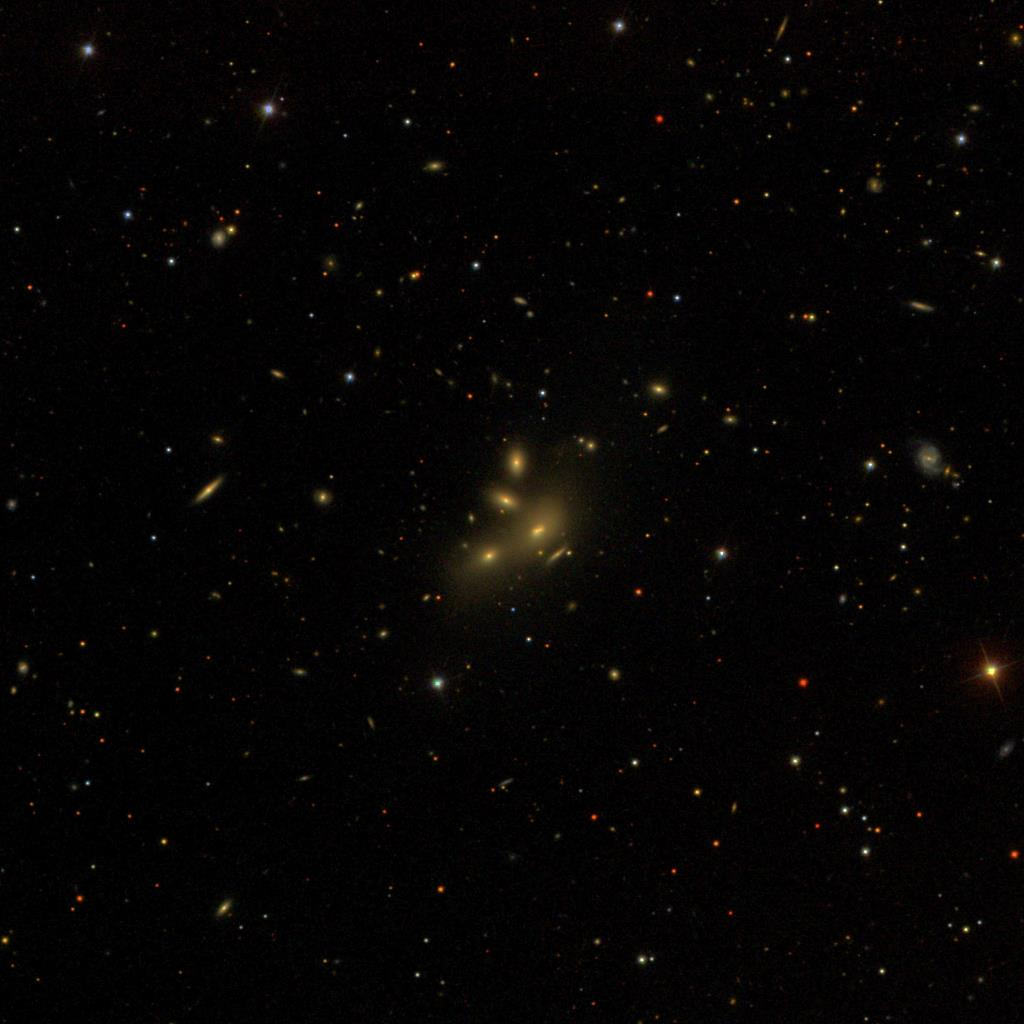

In [2]:
astroImage('HCG 8') #Find the image of HCG 8

#Function built based on https://learn.astropy.org/rst-tutorials/Coordinates-Intro.html?highlight=filtertutorials
#I have combined multiple steps in this tutorial into a function that outputs an astronomical image using the name of the object

HCG 8 coordinate <SkyCoord (ICRS): (ra, dec) in deg
    (12.397708, 23.581829)>


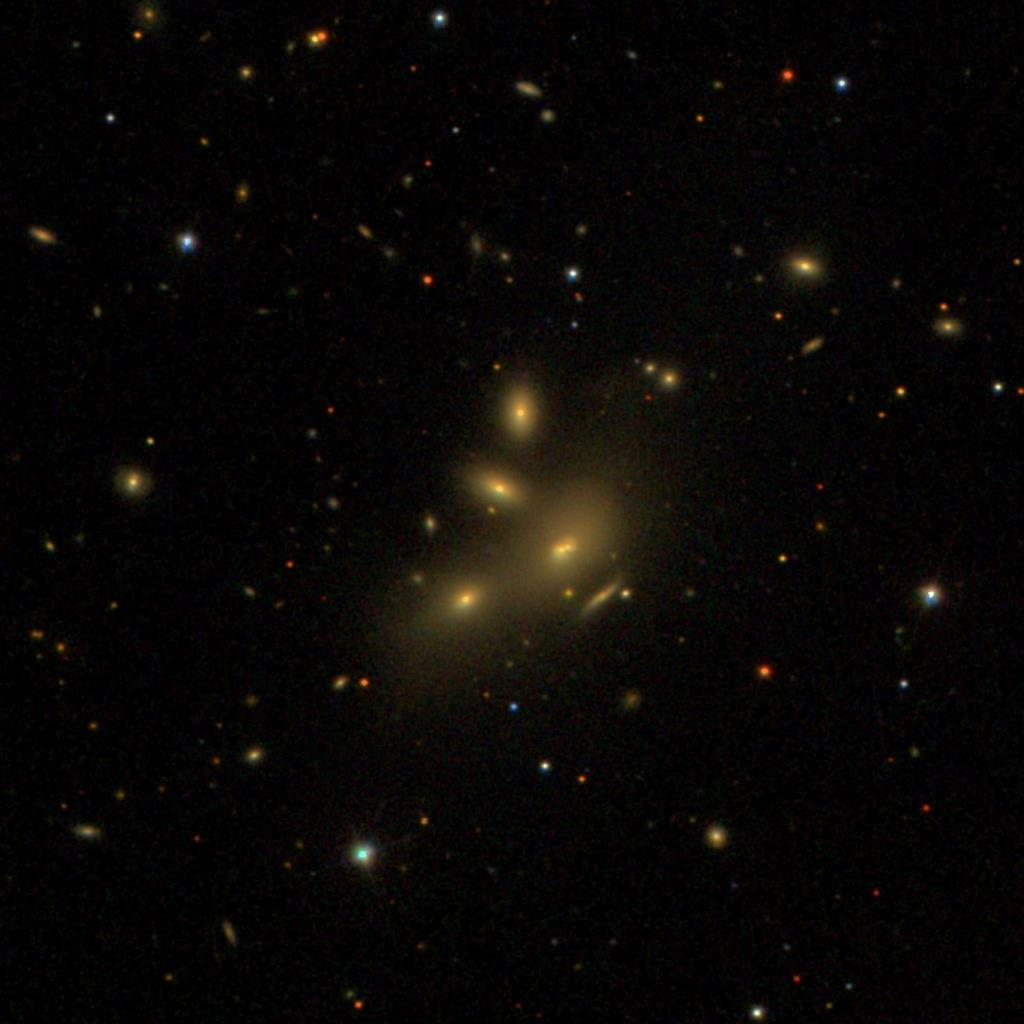

In [3]:
astroImage('HCG 8',im_size=6) #extracting the image with a smaller angle.

In [4]:
#csv from https://github.com/astropy/astropy-tutorials/blob/main/tutorials/notebooks/plot-catalog/Young-Objects-Compilation.csv
df = pd.read_csv('Young-Objects-Compilation.csv',skiprows=1)

### We will do some data analysis & visualization from here

In [5]:
df.head()

,Name,Designation,RA,Dec,Jmag,J_unc,Hmag,H_unc,Kmag,K_unc,...,pm_dec (mas),pm_dec_unc,pi (mas),pi_unc,radial velocity (km/s),rv_unc,Astrometry Refs,Discovery Refs,Group/Age,Note
0,NaN,00 04 02.84 -64 10 35.6,1.01201,-64.18,15.79,0.07,14.83,0.07,14.01,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kirkpatrick et al. 2010,NaN,NaN
1,PC 0025+04,00 27 41.97 +05 03 41.7,6.92489,5.06,16.19,0.09,15.29,0.10,14.96,0.12,...,-0.0008,0.0003,NaN,NaN,NaN,NaN,Faherty et al. 2009,Schneider et al. 1991,NaN,NaN
2,NaN,00 32 55.84 -44 05 05.8,8.23267,-44.08,14.78,0.04,13.86,0.03,13.27,0.04,...,-0.0916,0.0043,38.4,4.8,NaN,NaN,Faherty et al. 2012,Reid et al. 2008,NaN,NaN
3,NaN,00 37 43.06 -58 46 22.9,9.42942,-58.77,15.37,0.05,14.26,0.05,13.59,0.05,...,-0.0510,0.0200,NaN,NaN,NaN,NaN,Faherty et al. 2009,Reid et al. 2008,NaN,NaN
4,NaN,00 45 21.43 +16 34 44.6,11.33929,16.58,13.06,0.02,12.06,0.04,11.37,0.02,...,-0.0260,0.0120,NaN,NaN,NaN,NaN,Faherty et al. 2009,Wilson et al. 2003,NaN,NaN


In [6]:
df.columns

Index(['Name', 'Designation', 'RA', 'Dec', 'Jmag', 'J_unc', 'Hmag', 'H_unc',
       'Kmag', 'K_unc', 'W1', 'W1_unc', 'W2', 'W2_unc', 'W3', 'W3_unc', 'W4',
       'W4_unc', 'Spectral Type', 'Spectra (FITS)', 'Opt Spec Refs',
       'NIR Spec Refs', 'pm_ra (mas)', 'pm_ra_unc', 'pm_dec (mas)',
       'pm_dec_unc', 'pi (mas)', 'pi_unc', 'radial velocity (km/s)', 'rv_unc',
       'Astrometry Refs', 'Discovery Refs', 'Group/Age', 'Note'],
      dtype='object')

In [7]:
df.shape

(64, 34)

In [8]:
df['RA']

0       1.01201
1       6.92489
2       8.23267
3       9.42942
4      11.33929
        ...    
59    332.05679
60    333.43715
61    342.47273
62          NaN
63    350.72079
Name: RA, Length: 64, dtype: float64

Text(0, 0.5, '$J$')

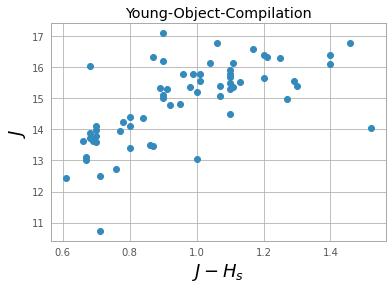

In [9]:
plt.scatter(df["Jmag"] - df["Hmag"], df["Jmag"]) # plot J-H vs. J
plt.title('Young-Object-Compilation')
plt.xlabel("$J-H_s$", fontsize=18)
plt.ylabel("$J$", fontsize=18)

/home/t4zhou/.local/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in remainder
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


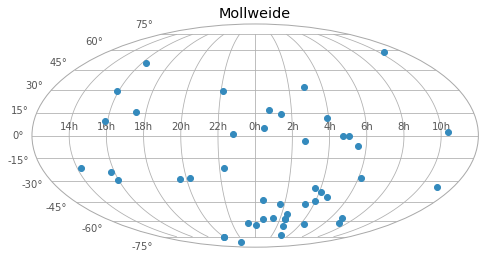

In [10]:
#plotting a mollweide graph
ra = coord.Angle(df['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df['Dec']*u.degree)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']) #converting degree labels to units of hours
ax.grid(True)

In [11]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True ) #download fits file

In [12]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


(-0.5, 890.5, 892.5, -0.5)

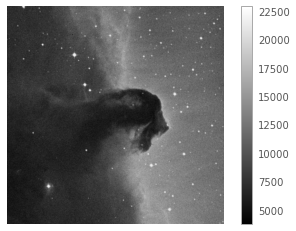

In [13]:
#show the download file
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.axis('off')

<Figure size 432x288 with 0 Axes>

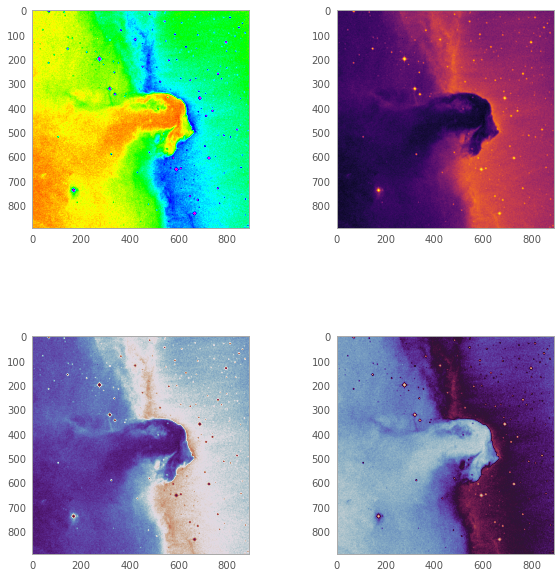

In [14]:
#because previous graph is so cool, I'm going to define a function to colormap it and make it pretty. Enjoy!
fourimgshow(image_data)

In [15]:
basic_stats('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits') #basic stats of the downloaded .fits image

Min: 3759 Max: 22918 Mean: 9831.481676287574 Stdev: 3032.3927542049046


In [16]:
!pwd

/home/t4zhou/Project_Sp21


In [17]:
%cd my_module

/home/t4zhou/Project_Sp21/my_module


In [18]:
!pytest test_functions.py

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1
rootdir: /home/t4zhou/Project_Sp21/my_module
collected 3 items                                                              

test_functions.py ...                                                    [100%]

============================== 3 passed in 1.90s ===============================


#### Extra Credit (*optional*)

Replace all of this text with a brief explanation (~3 sentences) of: 
1. Your Python Background

    I have a some machine learning and data science background, self-learning it and did a few projects. About 2 years of self study experience.
<br> 
2. How your project went above and beyond the requirements of the project and/or how you challenged yourself to learn something new with the final project
<br> 
    In this project, I am trying to connect data visualization with astronomy. As I am an astrophysics major, my plan is to create a astronomy project based on the famous astrophysics package "Astropy". I have heard of this package but I have not learn it at all. I will also try to combine the use of Astropy to what we learned, e.g. pandas, numpy and matplotlib. It is always one of my goal to learn this package as it will help with my astrophysics research analysis.
    <br> 
      
    Overall, I am trying to hit three birds with one stone: Doing a project for my cogs18 final, Learning the code skill for my astronomy research, and enjoying coding within my research interests. Hope that did not sound too ambitious. 